# ASSIGNMENT 6 : SIMULATED ANNEALING

I have used simulated annealing.

In [1]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#To generate random coordinates
N = 40 #no. of cities, N can be varied accordingly
x_cities = np.random.random((N,1))
y_cities = np.random.random((N,1))

In [ ]:
#if file is given
city_file = open('filename.txt')
read = city_file.readlines()
coord= []
x_cities = []
y_cities = []

for line in read:
    temp = line.split()
    coord.append(temp)
    
for i in range(len(coord)):
    N = float(coord[0][0])#no. of cities
    if i != 0 :
        x_cities.append(float(coord[i][0]))
        y_cities.append(float(coord[i][1]))

- I have defined a function `distance`. It takes in cities and city order to calculate the total distance travelled.(starting city and ending city are the same.
- I have defined the parameters temperature T and decay rate. They have to be changed according to the specific problem, for better results.

 I chose the first order to be in number sequence. And I found the distance travelled in this case and stored it as `initial_dist`.
 
- I defined tsp for implementing simulated annealing. My goal is to minimise the distance than the initial distance, so I tried swapping the order.

- For swapping:

    - I tried swapping the city order by random selection. I ran the code with different number of cities, even for small no. of cities, it didn't give satisfactory results. It gave me both worse and the best possibilites with equal chances. I had to change this random selection for swapping.
    
    - I used `np.random.permutation` under numpy. It checks for different permutations. Most of the times it gave me good results. For minimised the distance the code has to be run several times, by manual observation one has to choose the best minimised distance. The distance travelled is always better than the first chosen order.
    
- After the swapping the order, if the newly generated order gives me lesser distance, bestcost is updated to the new distance, cityorder is also updated. If not, using `np.random.random_sample()`, a number between (0,1) is chosen. If the probability calculated using simulated annealing is greater than the randomly generated probability, the order is accepted.

- I created a function `min_dist`. It basically runs the tsp for several times and stores the distance obtained each time. Finally it gives the best minimum distance obtained in all the runs. One can increase the no of times the program runs, but also should take care of time constraint. Running the program more times can effect the performance. But it is also necessary, if dealing with higher no. of cities say above 10.

- In the end, `improv` calculates the percentage improvement in distance covered from the initial distance to the final distance obtained.

Final order is : [27  8  6  0 38 33 32 17 20 19  1 29 22  3 15  9 16  7 35  2  5 28 37 11
 36 23 14 39 18 26 34 10  4 12 25 24 30 13 21 31]
Final distance covered by travelling salesman is : 16.32234601462674


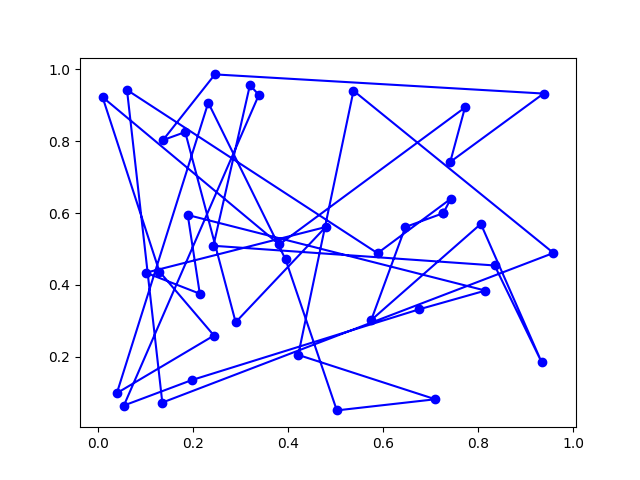

Percentage improvemnet in the distance covered : 20.48185244066078


In [5]:
%matplotlib ipympl
def distance(cities, cityorder):
    x = []
    y = []
    totaldistance = 0
    l = len(cities)
    for number in cityorder:
        x.append(cities[number][0])
        y.append(cities[number][1])
    for i in range(l-1):
        totaldistance += np.sqrt((x[i+1] - x[i])**2 + (y[i+1] - y[i])**2)
    totaldistance += np.sqrt((x[0] - x[l-1])**2 + (y[0] - y[l-1])**2)    
    return totaldistance

cities = []
for i in range(len(x_cities)):
    cities.append((x_cities[i],y_cities[i]))
cities = np.asarray(cities)  

T = 100
decayrate = 0.995
order = []

#creating a random order initially
for i in range(len(x_cities)):
    order.append(i)
initial_dist = distance(cities, order)

def tsp(cities):
    global order, T, decayrate
    cityorder = order
    bestcost = distance(cities, order)
    iterations = 0
    while T > 0.01:
        #to change the order
        order = np.random.permutation(len(cities))
        new_dist = distance(cities, order)

        if new_dist < bestcost:
            cityorder = order
            bestcost = new_dist
        else:
            probability = np.random.random_sample()
            acceptance = np.exp(-(new_dist - bestcost)/T)
            if probability < acceptance :
                cityorder = order
                bestcost = new_dist
        T *= decayrate
        
    return cityorder

# running the tsp function 100 times for better results
def min_dist(cities):
    finalorder = tsp(cities)
    orderlist =[]
    distlist = []
    for i in range(100):
        finalorder = tsp(cities)
        dist = distance(cities, finalorder)
        orderlist.append(finalorder)
        distlist.append(dist)
    accepted_dist = np.argmin(distlist)
    return orderlist[index]

finalorder = tsp(cities)
print(f"Final order is : {finalorder}")
final_dist = distance(cities,finalorder)
print(f"Final distance covered by travelling salesman is : {final_dist}")

#plotting the graph      
xplot = x_cities[finalorder] 
yplot = y_cities[finalorder]
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])
plt.plot(xplot, yplot, 'bo-')
plt.show()

#for improvement in the disatnce      
improv = ((initial_dist - final_dist)/initial_dist) * 100
print(f"Percentage improvemnet in the distance covered : {improv}")

#### For 40 cities data given, the solution is :

Final order is : [32 35 36 20 14 17 37  5 38 39 19 30 21 23 25  2  7 18 24 12  9 11  1 13
 26  6  3 27  4 34 33  8 31 10 22 29  0 28 15 16]
Initial distance covered by travelling salesman is : 20.526567224728712
Final distance covered by travelling salesman is : 17.34162145738417


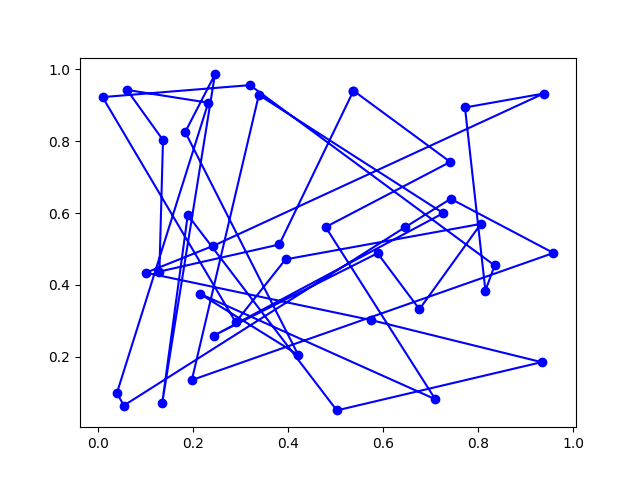

Percentage improvemnet in the distance covered : 15.51621239184885


In [4]:
#reading the file
%matplotlib ipympl
city_file = open('tsp40.txt')
read = city_file.readlines()
coord= []
x_cities = []
y_cities = []

for line in read:
    temp = line.split()
    coord.append(temp)
    
for i in range(len(coord)):
    N = float(coord[0][0])#no. of cities
    if i != 0 :
        x_cities.append(float(coord[i][0]))
        y_cities.append(float(coord[i][1]))
        
#converting the coordinates into arrays  
x_cities = np.asarray(x_cities)
y_cities = np.asarray(y_cities)

cities = []
for i in range(len(x_cities)):
    cities.append((x_cities[i],y_cities[i]))
cities = np.asarray(cities)  

T = 100
decayrate = 0.995
order = []

for i in range(len(x_cities)):
    order.append(i)
initial_dist = distance(cities, order)

finalorder = tsp(cities)

print(f"Final order is : {finalorder}")
final_dist = distance(cities,finalorder)
print(f"Initial distance covered by travelling salesman is : {initial_dist}")
print(f"Final distance covered by travelling salesman is : {final_dist}")

#plotting the graph      
xplot = x_cities[finalorder] 
yplot = y_cities[finalorder]
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])
plt.plot(xplot, yplot, 'bo-')
plt.show()
plt.savefig('city.png')

#for improvement in the disatnce      
improv = ((initial_dist - final_dist)/initial_dist) * 100
print(f"Percentage improvemnet in the distance covered : {improv}")